# <center> Aula 06 - Árvores de decisão

## <center> Submeta suas respostas para as perguntas no formulário

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import graphviz

### Parte 1. Toy dataset

Seu objetivo é descobrir como as árvores de decisão funcionam examinando um toy dataset. Embora uma única árvore de decisão não produza resultados excelentes, outros algoritmos de desempenho, como *Gradient Boosting* e *Random Forest*, baseiam-se na mesma ideia. É por isso que saber como as árvores de decisão funcionam pode ser útil.

Veremos um exemplo de classificação binária - a pessoa A está decidindo se vai ter um segundo encontro com a pessoa B. Isso vai depender de sua aparência, eloqüência, consumo de álcool (apenas por exemplo) e quanto dinheiro foi gasto no primeiro encontro.

#### Criação do conjunto de dados

In [ ]:
# Criação dataframe com variáveis ​​fictícias
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis = 1)
    out.drop(feature_list, axis = 1, inplace = True)
    return out

# Alguns valores de features estão presentes no treino e ausentes no teste e vice-versa.
def intersect_features(train, test):
    common_feat = list( set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]

In [ ]:
features = ['Looks', 'Alcoholic_beverage','Eloquence','Money_spent']

#### Dados do treino

In [ ]:
df_train = {}
df_train['Looks'] = ['handsome', 'handsome', 'handsome', 'repulsive',
                         'repulsive', 'repulsive', 'handsome'] 
df_train['Alcoholic_beverage'] = ['yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes']
df_train['Eloquence'] = ['high', 'low', 'average', 'average', 'low',
                                   'high', 'average']
df_train['Money_spent'] = ['lots', 'little', 'lots', 'little', 'lots',
                                  'lots', 'lots']
df_train['Will_go'] = LabelEncoder().fit_transform(['+', '-', '+', '-', '-', '+', '+'])

df_train = create_df(df_train, features)
df_train

,Will_go,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Eloquence_low,Money_spent_little,Money_spent_lots
0,0,1,0,0,1,0,1,0,0,1
1,1,1,0,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,0,0,1
3,1,0,1,1,0,1,0,0,1,0
4,1,0,1,0,1,0,0,1,0,1
5,0,0,1,0,1,0,1,0,0,1
6,0,1,0,0,1,1,0,0,0,1


#### Dados do treino

In [ ]:
df_test = {}
df_test['Looks'] = ['handsome', 'handsome', 'repulsive'] 
df_test['Alcoholic_beverage'] = ['no', 'yes', 'yes']
df_test['Eloquence'] = ['average', 'high', 'average']
df_test['Money_spent'] = ['lots', 'little', 'lots']
df_test = create_df(df_test, features)
df_test

,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Money_spent_little,Money_spent_lots
0,1,0,1,0,1,0,0,1
1,1,0,0,1,0,1,1,0
2,0,1,0,1,1,0,0,1


In [ ]:
# Alguns valores de features estão presentes no treino e ausentes no teste e vice-versa.
y = df_train['Will_go']
df_train, df_test = intersect_features(train=df_train, test=df_test)
df_train

,Eloquence_average,Alcoholic_beverage_yes,Looks_repulsive,Alcoholic_beverage_no,Money_spent_lots,Money_spent_little,Eloquence_high,Looks_handsome
0,0,1,0,0,1,0,1,1
1,0,1,0,0,0,1,0,1
2,1,0,0,1,1,0,0,1
3,1,0,1,1,0,1,0,0
4,0,1,1,0,1,0,0,0
5,0,1,1,0,1,0,1,0
6,1,1,0,0,1,0,0,1


In [ ]:
df_test

,Eloquence_average,Alcoholic_beverage_yes,Looks_repulsive,Alcoholic_beverage_no,Money_spent_lots,Money_spent_little,Eloquence_high,Looks_handsome
0,1,0,0,1,1,0,0,1
1,0,1,0,0,0,1,1,1
2,1,1,1,0,1,0,0,0


#### Treine uma árvore de decisão usando sklearn nos dados de treinamento. Você pode escolher qualquer profundidade para a árvore.

In [ ]:
## Seu código


#### Adicional: exiba a árvore resultante usando o graphviz.

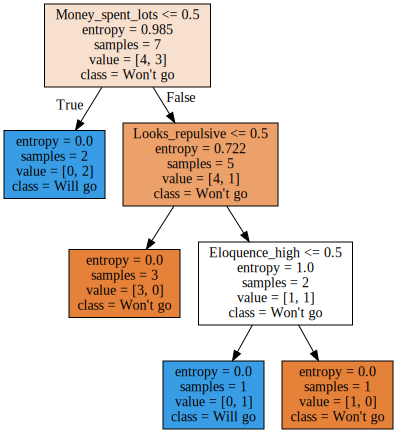

In [ ]:
graph_viz_data = export_graphviz(dt, feature_names=df_train.columns, filled=True,
            class_names=["Won't go", "Will go"])

# Plot da árvore...
graph = graphviz.Source(graph_viz_data, format="png") 
graph

### Parte 2. Funções para calcular entropia e ganho de informação.

Considere o seguinte exemplo de aquecimento: temos 9 bolas azuis e 11 bolas amarelas. Deixe que a bola tenha o rótulo **1** se for azul, **0** caso contrário.

In [ ]:
balls = [1 for i in range(9)] + [0 for i in range(11)]

<img src='https://habrastorage.org/webt/mu/vl/mt/muvlmtd2njeqf18trbldenpqvnm.png'>

Next split the balls into two groups:

<img src='https://habrastorage.org/webt/bd/aq/5w/bdaq5wi3c4feezaexponvin8wmo.png'>

In [ ]:
# Realizando a quebra da arvore em dois grupos...
balls_left  = [1 for i in range(8)] + [0 for i in range(5)] # 8 azuis e 5 amarelas
balls_right = [1 for i in range(1)] + [0 for i in range(6)] # 1 azul and 6 amarelas

#### Implementar uma função para calcular a entropia

In [ ]:
from math import log
    
def entropy(a_list):
    """
    Funcao que calcula a entropia de uma dada lista de valores

    Parametros:
        a_list -> Lista de elementos (nao necessariamente numericos)

    Retorno
        entropy -> valor da entropia
    """

    entropy = 0

    ################# Seu codigo aqui #################

    ###################################################

    return entropy

Tests

In [ ]:
print(entropy(balls)) # 9 azuis e 11 amarelas
print(entropy(balls_left)) # 8 azuis e 5 amarelas
print(entropy(balls_right)) # 1 azuis e 6 amarelas
print(entropy([1,2,3,4,5,6])) # entropia de um dado de 6 lados

0.9927744539878084
0.961236604722876
0.5916727785823275
2.584962500721156


1\. Qual é a entropia do nó que corresponde à variável **balls_left**?

2\. Qual é a entropia de um dado justo? (onde olhamos para um dado como um sistema com 6 estados igualmente prováveis)?

### Parte 3. Dataset de "gente grande"

#### Descrição:

[Dataset UCI](http://archive.ics.uci.edu/ml/machine-learning-databases/adult)   (não precisa baixar, o Colab faz o download automaticamente 😉): classificação de pessoas usando dados demográficos - se elas ganham mais de $ 50.000 por ano ou não.

Descrição das features

- **Age** – feature contínua
- **Workclass** –  feature contínua
- **fnlwgt** (final weight of object) – feature contínua
- **Education** –  feature categórica
- **Education_Num** (number of years of education)– feature contínua
- **Martial_Status** –  feature categórica
- **Occupation** –  feature categórica
- **Relationship** – feature categórica
- **Race** – feature categórica
- **Sex** – feature categórica
- **Capital_Gain** – feature contínua
- **Capital_Loss** – feature contínua
- **Hours_per_week** – feature contínua
- **Country** – feature categórica

**Target** – Nível de remuneração (binário, se ganha ou não ganha pelo menos 50 000).

#### Reading train and test data

In [ ]:
data_train = pd.read_csv('https://gist.githubusercontent.com/joaopedromattos/adf1c5c54322e5df5c289a5a51c11a22/raw/28b58d9188ebde1c4441db4b5a475a7d8f7a182c/adult_train.csv')

In [ ]:
data_train.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
data_test = pd.read_csv('https://gist.githubusercontent.com/joaopedromattos/adf1c5c54322e5df5c289a5a51c11a22/raw/28b58d9188ebde1c4441db4b5a475a7d8f7a182c/adult_test.csv')

In [ ]:
data_test.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
16276,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16277,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16278,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16279,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16280,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


In [ ]:
# Vamos remover as linhas que possuem um target incorreto no teste
data_test = data_test[(data_test['Target'] == ' >50K.') | (data_test['Target']==' <=50K.')]

# Codificação da variavel como binária
data_train.loc[data_train['Target']==' <=50K', 'Target'] = 0
data_train.loc[data_train['Target']==' >50K', 'Target'] = 1

data_test.loc[data_test['Target']==' <=50K.', 'Target'] = 0
data_test.loc[data_test['Target']==' >50K.', 'Target'] = 1

#### Análise de dados inicial

In [ ]:
data_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,16281,NaN,NaN,NaN,38.7675,13.8492,17,28,37,48,90
Workclass,15318,8,Private,11210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16281,NaN,NaN,NaN,189436,105715,13492,116736,177831,238384,1.4904e+06
Education,16281,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,16281,NaN,NaN,NaN,10.0729,2.56755,1,9,10,12,16
Martial_Status,16281,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,15315,14,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,16281,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,16281,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,16281,2,Male,10860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_train['Target'].value_counts()

0    24720
1     7841
Name: Target, dtype: int64

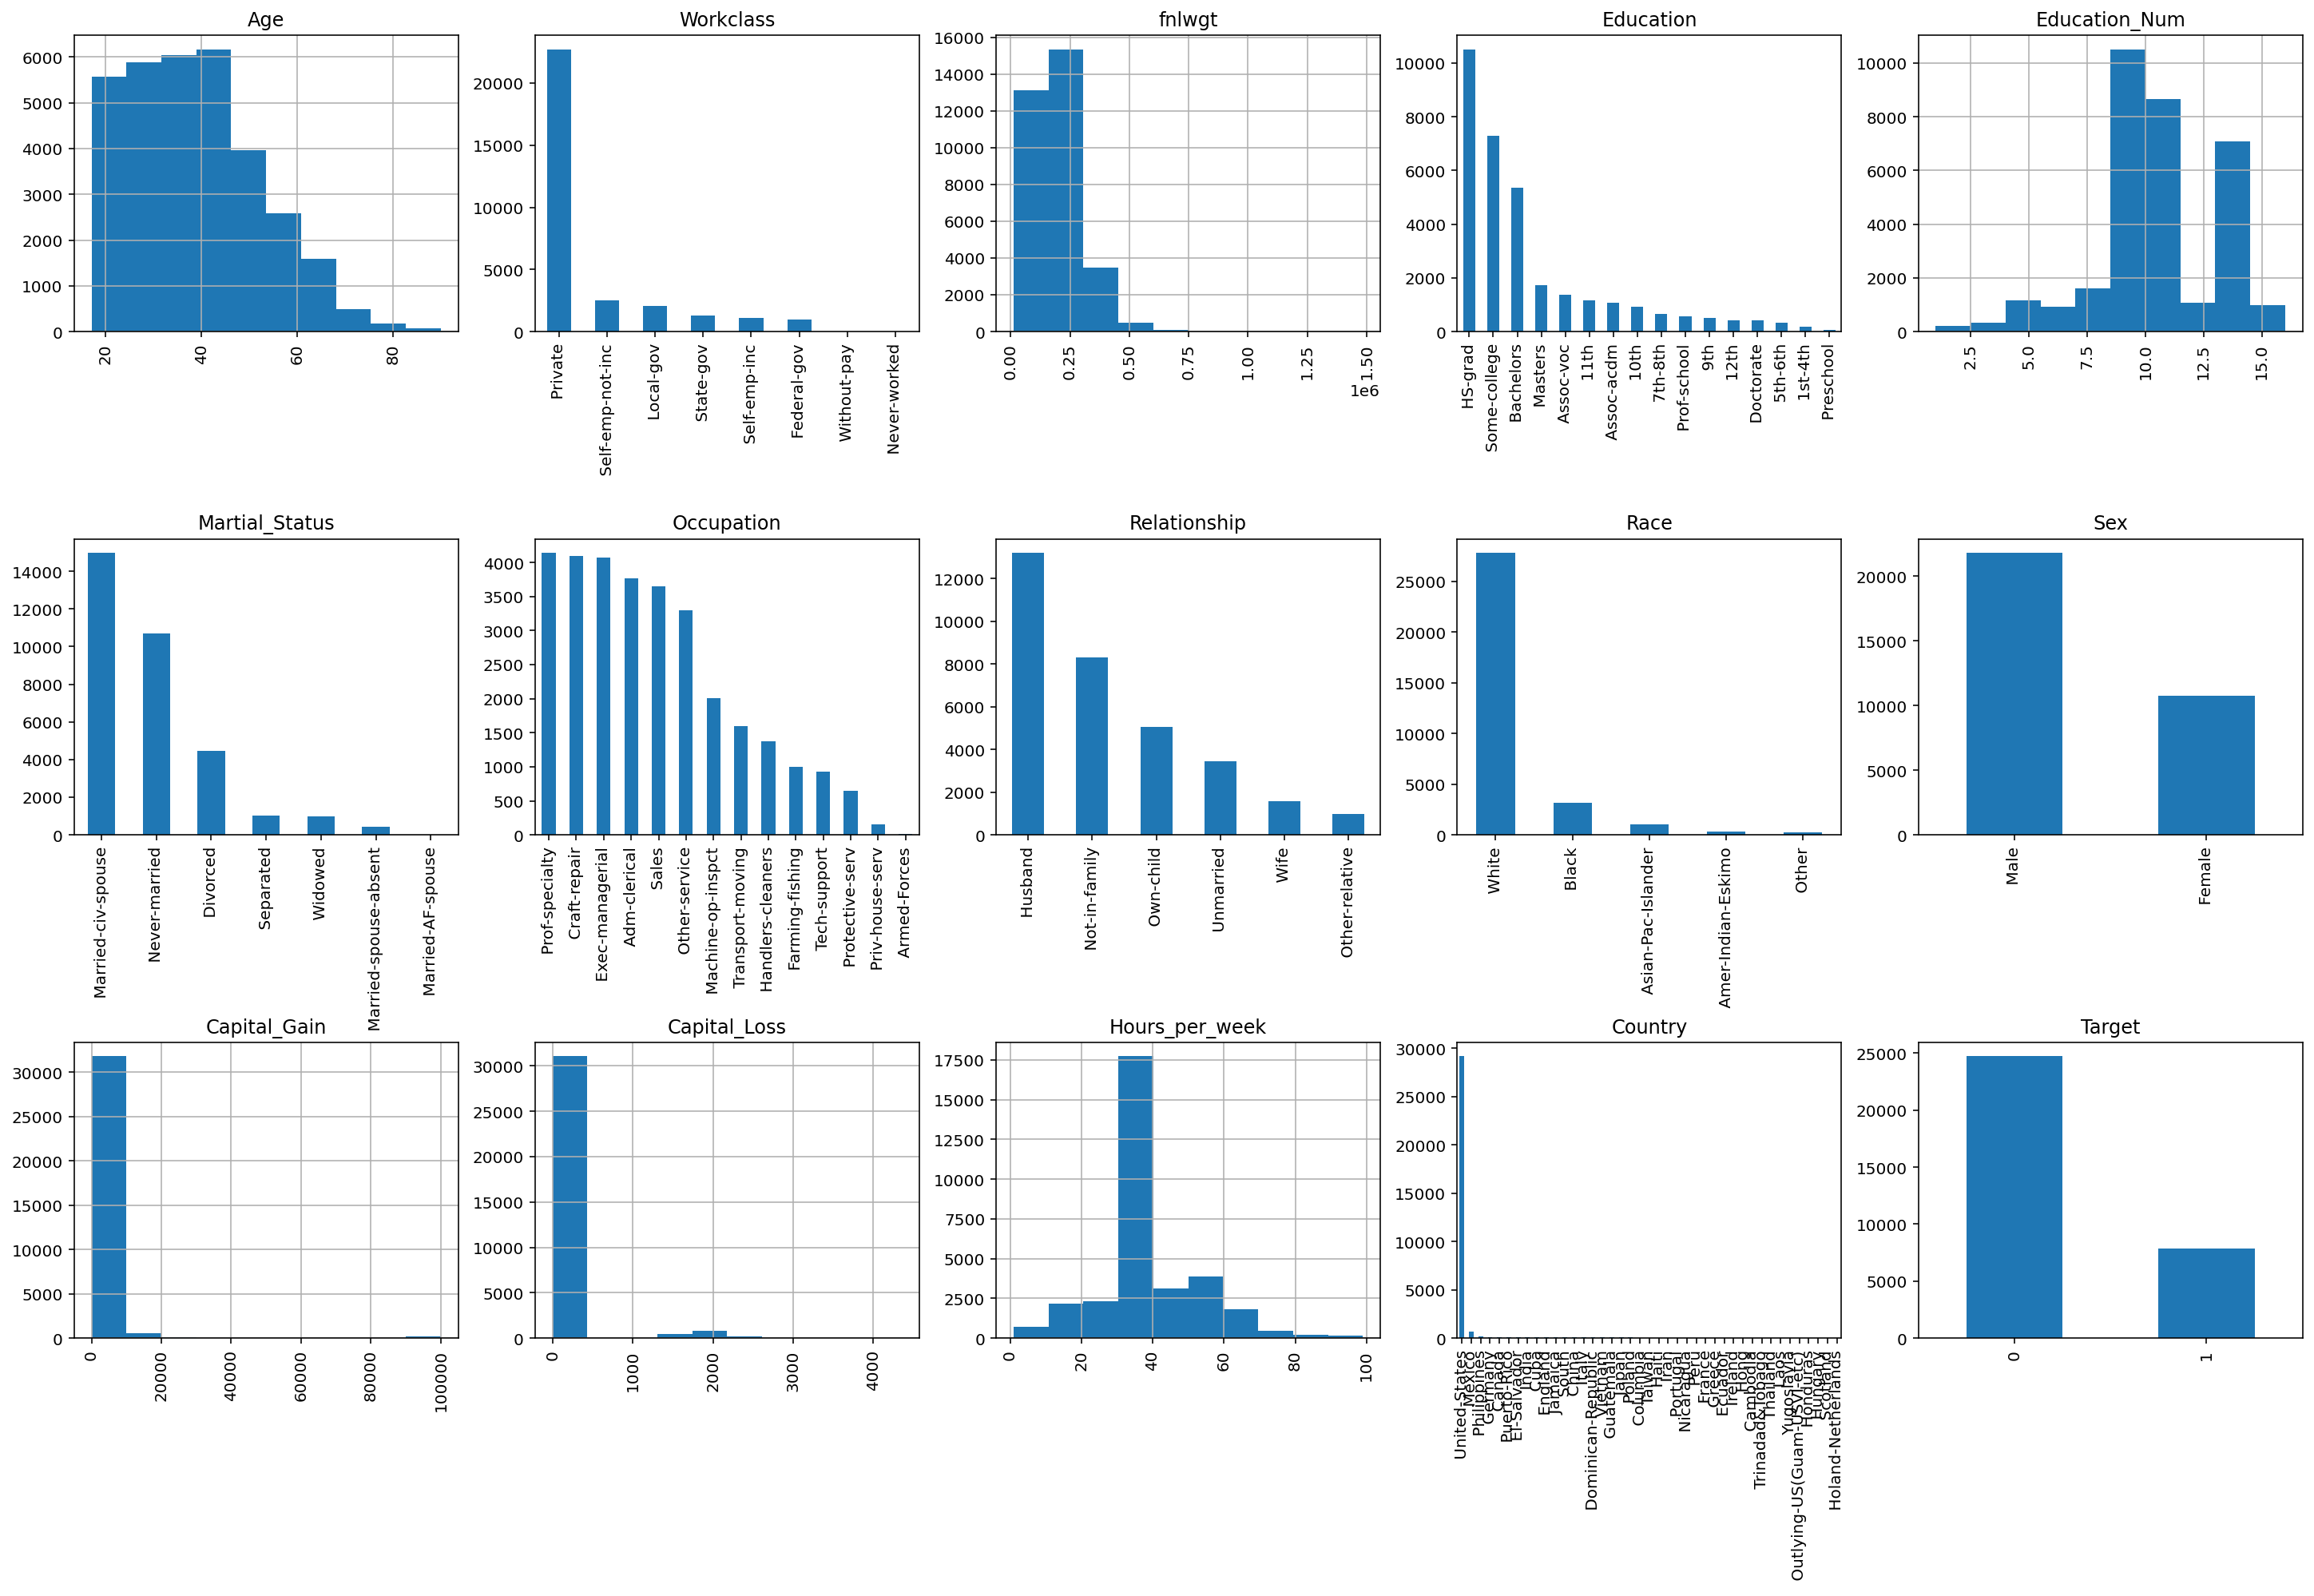

In [ ]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(data_train.shape[1]) / cols)
for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_train.dtypes[column] == np.object:
        data_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

#### Verificação dos tipos de dados do treino e do teste, respectivamente

In [ ]:
data_train.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target            object
dtype: object

In [ ]:
data_test.dtypes

Age                 int64
Workclass          object
fnlwgt            float64
Education          object
Education_Num     float64
Martial_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours_per_week    float64
Country            object
Target             object
dtype: object

Como podemos ver, nos dados de teste, a idade é tratada como tipo **object**. Precisamos consertar isso.

In [ ]:
data_test['Age'] = data_test['Age'].astype(int)

Além disso, vamos fazer o casting de todas as *features* do tipo **float** para o tipo **int** para manter os tipos consistentes entre nossos dados de treinamento e teste.

In [ ]:
data_test['fnlwgt'] = data_test['fnlwgt'].astype(int)
data_test['Education_Num'] = data_test['Education_Num'].astype(int)
data_test['Capital_Gain'] = data_test['Capital_Gain'].astype(int)
data_test['Capital_Loss'] = data_test['Capital_Loss'].astype(int)
data_test['Hours_per_week'] = data_test['Hours_per_week'].astype(int)

#### Preenchemos os dados ausentes para *features* contínuas com o valor da mediana. No caso de features categóricas, usamos a moda.

In [ ]:
# Conferindo quais colunas possuem dados faltantes
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Armazenamento dos nomes das colunas categoricas e numericas.
categorical_columns = [c for c in data_train.columns 
                       if data_train[c].dtype.name == 'object']
numerical_columns = [c for c in data_train.columns 
                     if data_train[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Target']
numerical_columns: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']


In [ ]:
# Preenchimento dos valores faltantes

for c in categorical_columns:
    data_train[c].fillna(data_train[c].mode()[0], inplace=True)
    data_test[c].fillna(data_train[c].mode()[0], inplace=True)
    
for c in numerical_columns:
    data_train[c].fillna(data_train[c].median(), inplace=True)
    data_test[c].fillna(data_train[c].median(), inplace=True)

In [ ]:
# Verificacao dos valores faltantes. Podemos ver que nao ha mais nulos :D
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Target          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


One-hot encoding para algumas variaveis: **Workclass**, **Education**, **Martial_Status**, **Occupation**, **Relationship**, **Race**, **Sex**, **Country**. Não faremos "na mão", pois o pandas já nos possibilita essa funcionalidade através do método **get_dummies**

In [ ]:
# One-hot encoding para valores do treino e do teste

data_train = pd.concat([data_train[numerical_columns],
    pd.get_dummies(data_train[categorical_columns])], axis=1)

data_test = pd.concat([data_test[numerical_columns],
    pd.get_dummies(data_test[categorical_columns])], axis=1)

Verificação das colunas que estão no treino e no teste

In [ ]:
set(data_train.columns) - set(data_test.columns)

{'Country_ Holand-Netherlands'}

In [ ]:
data_train.shape, data_test.shape

((32561, 106), (16281, 105))

A coluna `Country_ Holand-Netherlands` não existe no teste. Vamos criar essa coluna, mas preenchê-la com zeros :D

In [ ]:
data_test['Country_ Holand-Netherlands'] = 0

In [ ]:
set(data_train.columns) - set(data_test.columns)

set()

In [ ]:
data_train.head(2)

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 10th,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Martial_Status_ Divorced,Martial_Status_ Married-AF-spouse,Martial_Status_ Married-civ-spouse,Martial_Status_ Married-spouse-absent,Martial_Status_ Never-married,Martial_Status_ Separated,Martial_Status_ Widowed,Occupation_ Adm-clerical,Occupation_ Armed-Forces,...,Country_ Canada,Country_ China,Country_ Columbia,Country_ Cuba,Country_ Dominican-Republic,Country_ Ecuador,Country_ El-Salvador,Country_ England,Country_ France,Country_ Germany,Country_ Greece,Country_ Guatemala,Country_ Haiti,Country_ Holand-Netherlands,Country_ Honduras,Country_ Hong,Country_ Hungary,Country_ India,Country_ Iran,Country_ Ireland,Country_ Italy,Country_ Jamaica,Country_ Japan,Country_ Laos,Country_ Mexico,Country_ Nicaragua,Country_ Outlying-US(Guam-USVI-etc),Country_ Peru,Country_ Philippines,Country_ Poland,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
data_test.head(2)

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 10th,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Martial_Status_ Divorced,Martial_Status_ Married-AF-spouse,Martial_Status_ Married-civ-spouse,Martial_Status_ Married-spouse-absent,Martial_Status_ Never-married,Martial_Status_ Separated,Martial_Status_ Widowed,Occupation_ Adm-clerical,Occupation_ Armed-Forces,...,Country_ Canada,Country_ China,Country_ Columbia,Country_ Cuba,Country_ Dominican-Republic,Country_ Ecuador,Country_ El-Salvador,Country_ England,Country_ France,Country_ Germany,Country_ Greece,Country_ Guatemala,Country_ Haiti,Country_ Honduras,Country_ Hong,Country_ Hungary,Country_ India,Country_ Iran,Country_ Ireland,Country_ Italy,Country_ Jamaica,Country_ Japan,Country_ Laos,Country_ Mexico,Country_ Nicaragua,Country_ Outlying-US(Guam-USVI-etc),Country_ Peru,Country_ Philippines,Country_ Poland,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Country_ Holand-Netherlands
0,25,226802,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0,0,50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_train = data_train.drop(['Target'], axis=1)
y_train = data_train['Target']

X_test = data_test.drop(['Target'], axis=1)
y_test = data_test['Target']

### 3.1 Árvore de decisão sem ajuste de parâmetro

Treine uma árvore de decisão **(DecisionTreeClassifier)** com **max_depth** de 3 e avalie a *accuracy* nos dados de teste. Use o parâmetro **random_state = 17** para reprodutibilidade dos resultados.

In [ ]:
## Seu código aqui

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

Faça uma previsão com o modelo treinado nos dados de teste.

In [ ]:
## Seu codigo aqui

In [ ]:
## Seu codigo aqui

0.8447884036607088

3 \. Qual é a *accuracy* do conjunto da árvore de decisão no teste com **max_depth** da árvore igual a 3 e **random_state = 17**?

### 3.2 Árvore de decisão com ajuste de parâmetro

Treine uma árvore de decisão **(usando o random_state = 17).** Encontre a melhor profundidade usando 5-fold cross-validation **[(GridSearchCV)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)**. Com essa classe do Sklearn, você poderá realizar um GridSearch neste parâmetro e automaticamente encontrar o valor que maximiza o desempenho do modelo.

In [ ]:
%%time
## seu codigo aqui

CPU times: user 7.67 s, sys: 51.3 ms, total: 7.72 s
Wall time: 7.75 s


In [ ]:
print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)

Best params: {'max_depth': 9}
Best cross validaton score 0.8565770273854106


4. Qual o valor de **max_depth** encontrado pelo GridSearch?